<a href="https://colab.research.google.com/github/tabilaocov/ady_cov.github.io/blob/master/scr/tabilao/Fanamarinana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas.testing as tm


tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoafaritra.csv")

tilyvoaky = pd.read_csv("/content/drive/My Drive/data/dataky.csv")

tilyvoasaf = pd.read_csv("/content/drive/My Drive/data/datasaf.csv")

tilyvoafar = tilyvoa.groupby('Faritra')

tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)
tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)


tilyvoaanala = tilyvoafar.get_group('Analamanga')
tilyvoaanala.set_index('Daty', inplace=True)
tilyvoaanala.index = pd.to_datetime(tilyvoaanala.index)

tilyvoaatsi = tilyvoafar.get_group('Atsinanana')
tilyvoaatsi.set_index('Daty', inplace=True)
tilyvoaatsi.index = pd.to_datetime(tilyvoaatsi.index)

tilyvoaalao = tilyvoafar.get_group('Alaotra')
tilyvoaalao.set_index('Daty', inplace=True)
tilyvoaalao.index = pd.to_datetime(tilyvoaalao.index)

tilyvoamania = tilyvoafar.get_group('Mania')
tilyvoamania.set_index('Daty', inplace=True)
tilyvoamania.index = pd.to_datetime(tilyvoamania.index)

tilyvoajiro = tilyvoafar.get_group('Analanjirofo')
tilyvoajiro.set_index('Daty', inplace=True)
tilyvoajiro.index = pd.to_datetime(tilyvoajiro.index)

tilyvoanosy = tilyvoafar.get_group('Anosy')
tilyvoanosy.set_index('Daty', inplace=True)
tilyvoanosy.index = pd.to_datetime(tilyvoanosy.index)

tilyvoaandro = tilyvoafar.get_group('Androy')
tilyvoaandro.set_index('Daty', inplace=True)
tilyvoaandro.index = pd.to_datetime(tilyvoaandro.index)

tilyvoaatsim = tilyvoafar.get_group('Atsimoandrefana')
tilyvoaatsim.set_index('Daty', inplace=True)
tilyvoaatsim.index = pd.to_datetime(tilyvoaatsim.index)

tilyvoaatsitsi = tilyvoafar.get_group('AtsimoAtsinanana')
tilyvoaatsitsi.set_index('Daty', inplace=True)
tilyvoaatsitsi.index = pd.to_datetime(tilyvoaatsitsi.index)

tilyvoabe = tilyvoafar.get_group('Betsiboka')
tilyvoabe.set_index('Daty', inplace=True)
tilyvoabe.index = pd.to_datetime(tilyvoabe.index)

tilyvoaboe = tilyvoafar.get_group('Boeny')
tilyvoaboe.set_index('Daty', inplace=True)
tilyvoaboe.index = pd.to_datetime(tilyvoaboe.index)

tilyvoabon = tilyvoafar.get_group('Bongolava')
tilyvoabon.set_index('Daty', inplace=True)
tilyvoabon.index = pd.to_datetime(tilyvoabon.index)

tilyvoadia = tilyvoafar.get_group('Diana')
tilyvoadia.set_index('Daty', inplace=True)
tilyvoadia.index = pd.to_datetime(tilyvoadia.index)

tilyvoatsiatr = tilyvoafar.get_group('Matsiatra')
tilyvoatsiatr.set_index('Daty', inplace=True)
tilyvoatsiatr.index = pd.to_datetime(tilyvoatsiatr.index)

tilyvoahoro = tilyvoafar.get_group('Ihorombe')
tilyvoahoro.set_index('Daty', inplace=True)
tilyvoahoro.index = pd.to_datetime(tilyvoahoro.index)

tilyvoatasy = tilyvoafar.get_group('Itasy')
tilyvoatasy.set_index('Daty', inplace=True)
tilyvoatasy.index = pd.to_datetime(tilyvoatasy.index)

tilyvoamel = tilyvoafar.get_group('Melaky')
tilyvoamel.set_index('Daty', inplace=True)
tilyvoamel.index = pd.to_datetime(tilyvoamel.index)

tilyvoamena = tilyvoafar.get_group('Menabe')
tilyvoamena.set_index('Daty', inplace=True)
tilyvoamena.index = pd.to_datetime(tilyvoamena.index)

tilyvoasava = tilyvoafar.get_group('Sava')
tilyvoasava.set_index('Daty', inplace=True)
tilyvoasava.index = pd.to_datetime(tilyvoasava.index)

tilyvoasofi = tilyvoafar.get_group('Sofia')
tilyvoasofi.set_index('Daty', inplace=True)
tilyvoasofi.index = pd.to_datetime(tilyvoasofi.index)

tilyvoakara = tilyvoafar.get_group('Vakinakaratra')
tilyvoakara.set_index('Daty', inplace=True)
tilyvoakara.index = pd.to_datetime(tilyvoakara.index)

tilyvoavavy = tilyvoafar.get_group('Vatovavy')
tilyvoavavy.set_index('Daty', inplace=True)
tilyvoavavy.index = pd.to_datetime(tilyvoavavy.index)

tilyvoakyfar = tilyvoaky.groupby('Faritra')

tilyvoaken = tilyvoakyfar.get_group('Kenya')
tilyvoaken.set_index('Daty', inplace=True)
tilyvoaken.index = pd.to_datetime(tilyvoaken.index)

tilyvoanbo = tilyvoakyfar.get_group('Nairobi')
tilyvoanbo.set_index('Daty', inplace=True)
tilyvoanbo.index = pd.to_datetime(tilyvoanbo.index)

tilyvoasaf.set_index('Daty', inplace=True)
tilyvoasaf.index = pd.to_datetime(tilyvoasaf.index)

path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [4]:
daty_data_manom = datetime.date(2021,5,4)
daty_data_mifar = datetime.date(2021,7,10)

format_date = lambda date_py: '{}-{}-{}'.format(date_py.year, date_py.month, date_py.day)

In [5]:
sitranrehw_far = 40318

for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i == 0:
    tilyvoamdg.loc[format_date(daty_data_mifar - datetime.timedelta(days = i)),'Sitranrehw'] = sitranrehw_far
  else:
    tilyvoamdg.loc[format_date(daty_data_mifar - datetime.timedelta(days = i)),'Sitranrehw'] =  tilyvoamdg.loc[format_date(daty_data_mifar - datetime.timedelta(days = i - 1)),'Sitranrehw'] - tilyvoamdg.loc[format_date(daty_data_mifar - datetime.timedelta(days = i -1)),'Sitranvao tvm'] 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


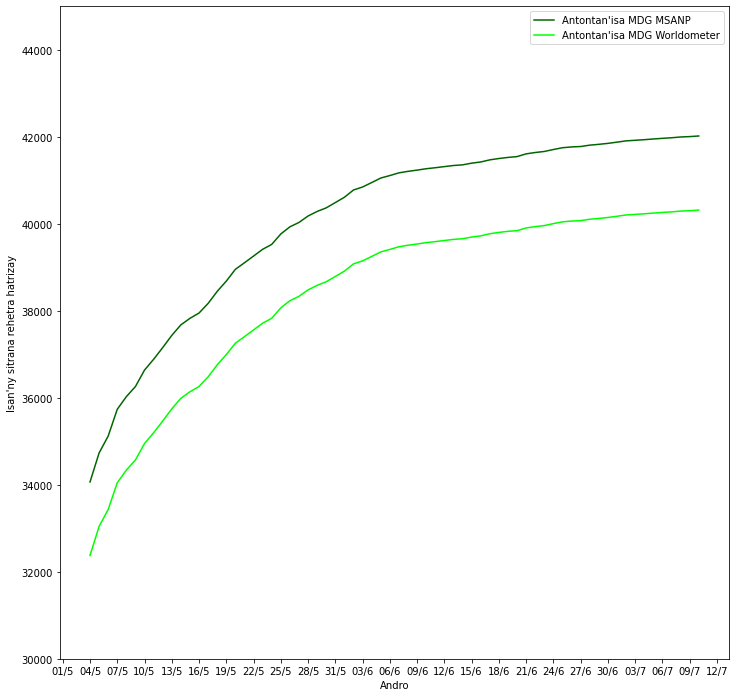

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar, 'Sitranreh tvm'], color='darkgreen',label="Antontan'isa MDG MSANP")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar, 'Sitranrehw'], color='lime',label="Antontan'isa MDG Worldometer")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana rehetra hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(30000,45000)
plt.savefig(path_to_save+'sitrrehzaomsanpw.eps')
plt.savefig(path_to_save+'sitrrehzaomsanpw.png')

plt.show()

## Ireo mbola voa

In [7]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoa'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voareh tomb'] - tilyvoamdg.loc[format_date(daty_data_manom  + datetime.timedelta(days = i)),'Sitranreh tvm'] - tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodimandry reh']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoaw'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voareh tomb'] - tilyvoamdg.loc[format_date(daty_data_manom  + datetime.timedelta(days = i)),'Sitranrehw'] - tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodimandry reh']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


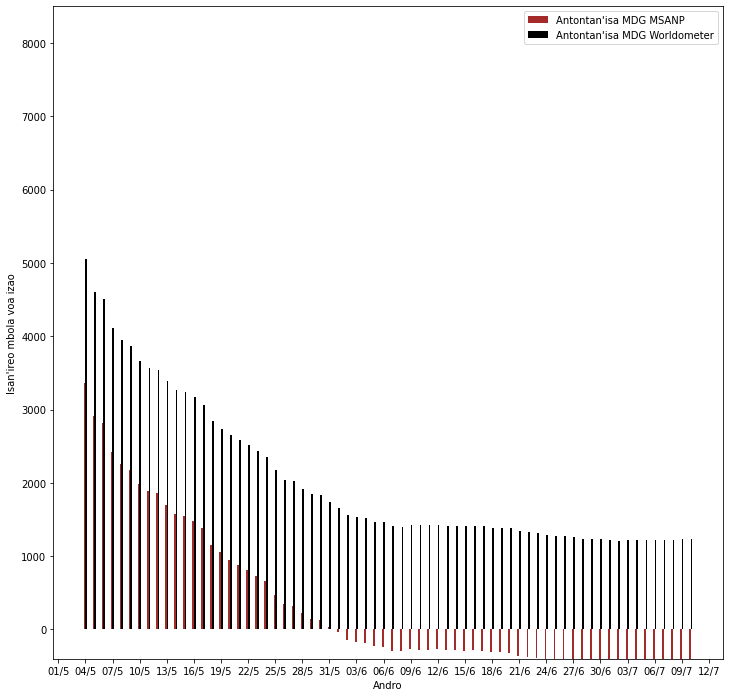

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index - frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Mbolvoa'], width=0.2, color='brown',label="Antontan'isa MDG MSANP")
ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index + frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Mbolvoaw'], width=0.2, color='black',label="Antontan'isa MDG Worldometer")

ax.set(xlabel ='Andro', ylabel = "Isan'ireo mbola voa izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(-400,8500)
plt.savefig(path_to_save+'mbolvoazaomsanpw.eps')
plt.savefig(path_to_save+'mbolvoazaomsanpw.png')

plt.show()

### Ireo isa hatrizay

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


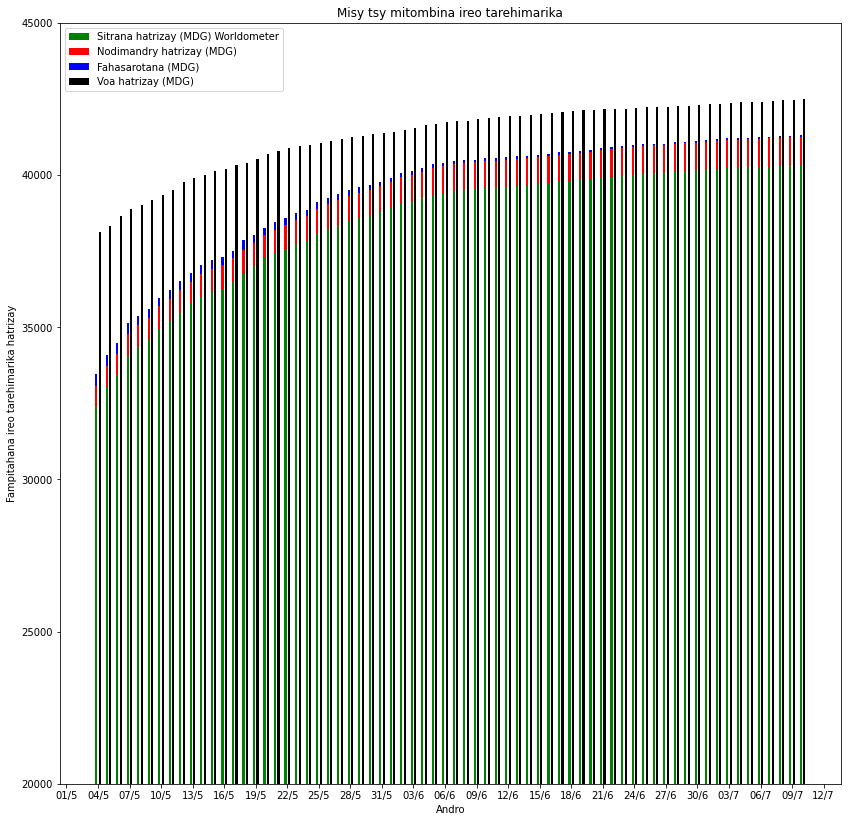

In [10]:

fig, ax = plt.subplots(figsize=(14, 14))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranrehw'], width= 0.2, color = 'green',label = 'Sitrana hatrizay (MDG) Worldometer')
ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], width= 0.2, bottom = tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranrehw'], color = 'red', label = 'Nodimandry hatrizay (MDG)')
ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width= 0.2, bottom = tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranrehw'] + tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], color = 'blue', label = 'Fahasarotana (MDG)')

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index + 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voareh tomb'], width= 0.2, color = 'black',label = 'Voa hatrizay (MDG)')



ax.set(xlabel ='Andro', ylabel = "Fampitahana ireo tarehimarika hatrizay", title = 'Misy tsy mitombina ireo tarehimarika')

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(20000,45000)
plt.savefig(path_to_save+'fampitahrehw.eps')
plt.savefig(path_to_save+'fampitahrehw.png')

plt.show()

In [11]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Tahasitrw'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranrehw']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voareh tvm']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


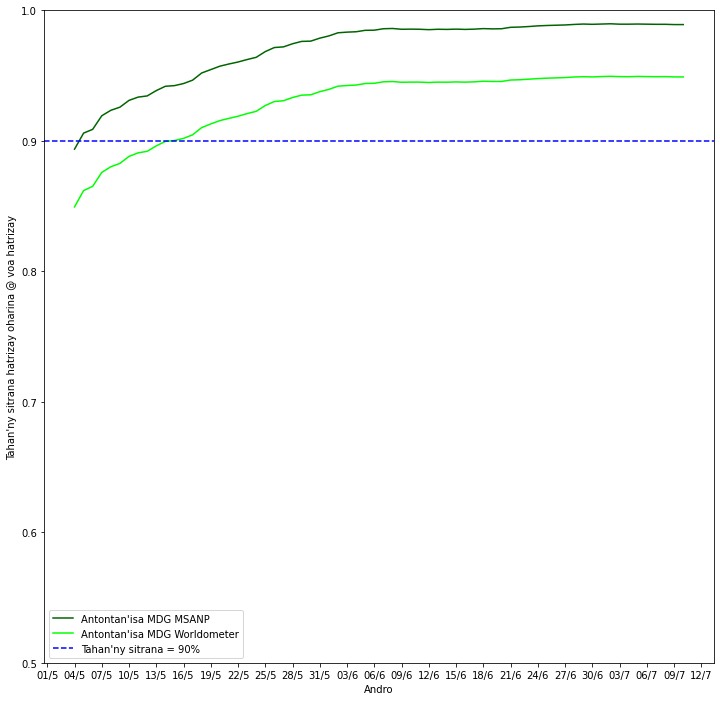

In [12]:

fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='darkgreen',label="Antontan'isa MDG MSANP")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar ,'Tahasitrw'], color='lime',label="Antontan'isa MDG Worldometer")
#ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='lightseagreen',label="Antontan'isa Kenya")
ax.axhline(y=0.9, color='b', linestyle='dashed', label ="Tahan'ny sitrana = 90%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ny sitrana hatrizay oharina @ voa hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0.5,1)
plt.savefig(path_to_save+'tahasitrzaomsanpw.eps')
plt.savefig(path_to_save+'tahasitrzaomsanpw.png')
plt.show()